This notebook will be analysing the various factor that contribute to students perfomance

We start by importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   

Reading the data into data frame and performing exploratory analysis

In [2]:

df = pd.read_csv(r'C:\Users\User\Desktop\FIRDAWS DATA  SCIENCE STUFF\StudentsPerformance (5) - StudentsPerformance (5) CVSV.csv') 

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.index = range (1,1001)

In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
996,female,group E,master's degree,standard,completed,88,99,95
997,male,group C,high school,free/reduced,none,62,55,55
998,female,group C,high school,free/reduced,completed,59,71,65
999,female,group D,some college,standard,completed,68,78,77
1000,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df['average scores'] = df[['math score', 'reading score', 'writing score']].mean(axis = 1)

In [8]:
df['average scores']

1       72.666667
2       82.333333
3       92.666667
4       49.333333
5       76.333333
          ...    
996     94.000000
997     57.333333
998     65.000000
999     74.333333
1000    83.000000
Name: average scores, Length: 1000, dtype: float64

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average scores'],
      dtype='object')

In [10]:
df.describe()

,math score,reading score,writing score,average scores
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [11]:
df['math score'].mode()

0    65
dtype: int64

In [12]:
df['math score'].median()

66.0

In [13]:
df['reading score'].mode()

0    72
dtype: int64

In [14]:
df['reading score'].median()

70.0

In [15]:
df['writing score'].mode()

0    74
dtype: int64

In [16]:
df['writing score'].median()

69.0

In [17]:
bygender = df.groupby('gender')
bygender['test preparation course'].describe()

,count,unique,top,freq
gender,,,,
female,518,2,none,334
male,482,2,none,308


In [18]:
bygender['average scores'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,69.569498,14.541809,9.0,60.666667,70.333333,78.666667,100.0
male,482.0,65.837483,13.698840,23.0,56.000000,66.333333,76.250000,100.0


In [19]:
bygender['lunch'].describe()

,count,unique,top,freq
gender,,,,
female,518,2,standard,329
male,482,2,standard,316


In [20]:
bygender['race/ethnicity'].describe()

,count,unique,top,freq
gender,,,,
female,518,5,group C,180
male,482,5,group C,139


In [21]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

Then we move to visualiztion

Showing the counts by gender

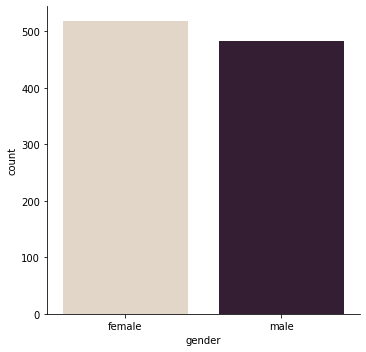

In [22]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=df)

Displaying the average scores by gender

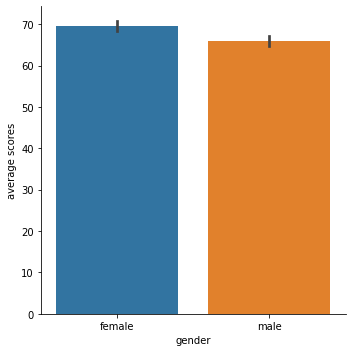

In [23]:
sns.catplot(x="gender", y="average scores",  kind="bar", data=df)

Analysing and visualizing performance by race/ethnicity.

In [25]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [26]:
byrace = df.groupby('race/ethnicity')
byrace.describe()

math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      reading score             ... writing score         \
                  max         count       mean  ...           75%    max   
race/ethnicity                                  ...                        
group A         100.0          89.0  64.674157  ...         73.00   97.0   
group B          97.0         190.0  67.352632  ...         78.00   96.0   
group C          98.0         319.0  69.103448  ...         79.00  100.0   
group D         100.0         262.0  70.030534  ...         80.00  100.0   
group E         100.0         140.0  73.028571  ...         80.25  100.0   

               average scores                                              \
                        count       mean        std        min        25%   
race/ethnicity                                                              
group A                  89.0  62.992509  14.444598  23.333333  52.000000   
group B                 190.0  65.468421  14.732133  18.333333  56.666667   
group C                 319.0  67.131661  13.872211   9.000000  57.666667   
group D                 262.0  69.179389  13.252776  31.000000  60.333333   
group E                 140.0  72.752381  14.565016  26.000000  64.666667   

                                                  
                      50%        75%         max  
race/ethnicity                                    
group A         61.333333  73.000000   96.333333  
group B         65.000000  76.833333   96.666667  
group C         68.333333  77.000000   98.666667  
group D         70.000000  78.583333   99.000000  
group E         73.500000  82.416667  100.000000  

[5 rows x 32 columns]

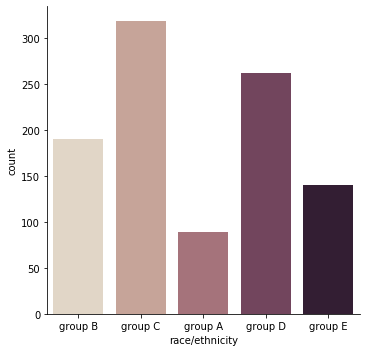

In [27]:
sns.catplot(x="race/ethnicity", kind="count", palette="ch:.25", data=df)


Showing the relationship between parental level of education and performance.

In [28]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

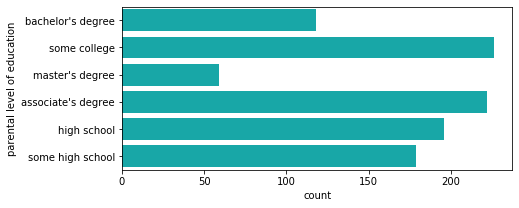

In [29]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="parental level of education", data=df, color="c")

Analysis of the effect of lunch on performance

In [30]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [31]:
bylunch = df.groupby('lunch')
bylunch.describe()

math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             reading score             ... writing score         \
                     count       mean  ...           75%    max   
lunch                                  ...                        
free/reduced         355.0  64.653521  ...          74.0  100.0   
standard             645.0  71.654264  ...          81.0  100.0   

             average scores                                                    \
                      count       mean        std   min        25%        50%   
lunch                                                                           
free/reduced          355.0  62.199061  14.458324   9.0  52.833333  62.666667   
standard              645.0  70.837209  13.186505  26.0  62.333333  71.333333   

                                     
                    75%         max  
lunch                                
free/reduced  72.500000   97.666667  
standard      79.666667  100.000000  

[2 rows x 32 columns]

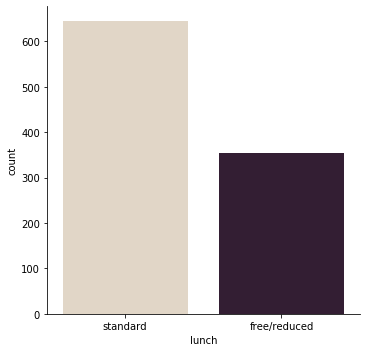

In [32]:
sns.catplot(x="lunch", kind="count", palette="ch:.25", data=df)

Showing the relationship between performance and taking a preparation course

In [33]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [34]:
byprep = df.groupby('test preparation course')
byprep.describe()

math score                                          \
                             count       mean        std   min   25%   50%   
test preparation course                                                      
completed                    358.0  69.695531  14.444699  23.0  60.0  69.0   
none                         642.0  64.077882  15.192376   0.0  54.0  64.0   

                                      reading score             ...  \
                           75%    max         count       mean  ...   
test preparation course                                         ...   
completed                79.00  100.0         358.0  73.893855  ...   
none                     74.75  100.0         642.0  66.534268  ...   

                        writing score        average scores             \
                                  75%    max          count       mean   
test preparation course                                                  
completed                        83.0  100.0          358.0  72.669460   
none                             74.0  100.0          642.0  65.038941   

                                                                     \
                               std        min        25%        50%   
test preparation course                                               
completed                13.036960  34.333333  65.000000  73.500000   
none                     14.186707   9.000000  55.416667  65.333333   

                                           
                               75%    max  
test preparation course                    
completed                82.166667  100.0  
none                     75.000000  100.0  

[2 rows x 32 columns]

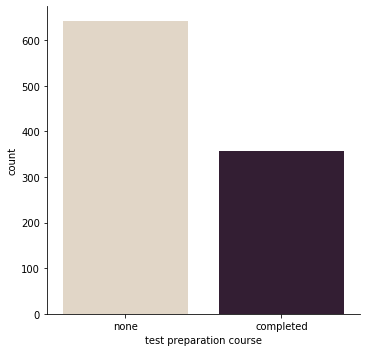

In [35]:
sns.catplot(x="test preparation course", kind="count", palette="ch:.25", data=df)

Other descriptive analysis and visualizations

- Mathematics performance by gender.

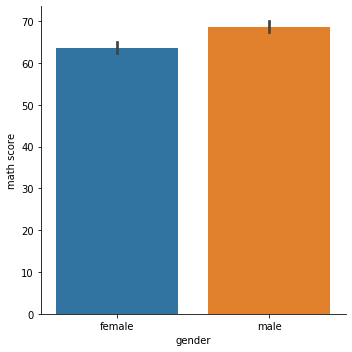

In [36]:
sns.catplot(x="gender", y="math score",  kind="bar", data=df)

- Writing performance by gender.

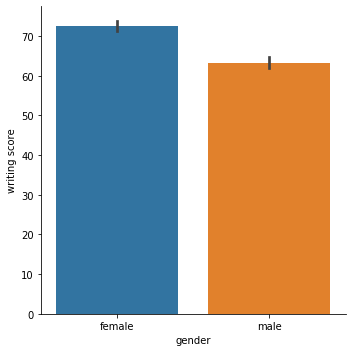

In [37]:
sns.catplot(x="gender", y="writing score",  kind="bar", data=df)

- Reading performance by gender.

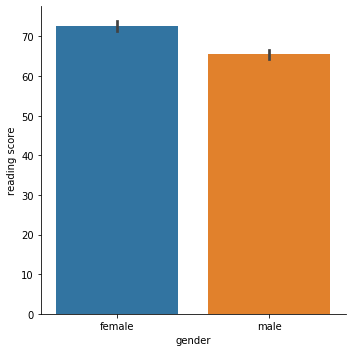

In [38]:
sns.catplot(x="gender", y="reading score",  kind="bar", data=df)

- Average scores by gender.

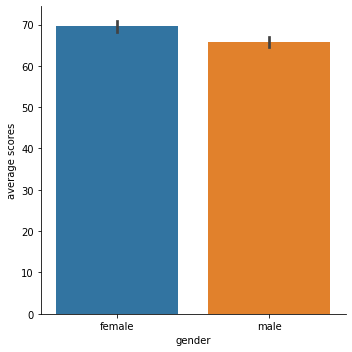

In [39]:
sns.catplot(x="gender", y="average scores",  kind="bar", data=df)

- Average scores by type of lunch.

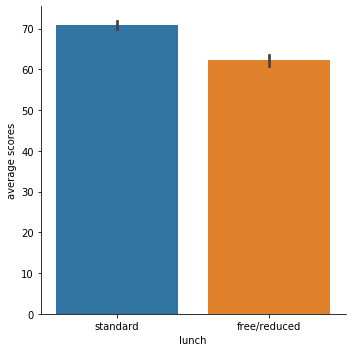

In [40]:
sns.catplot(x="lunch", y="average scores",  kind="bar", data=df)

- Relationship between gender, type of lunch and average scores

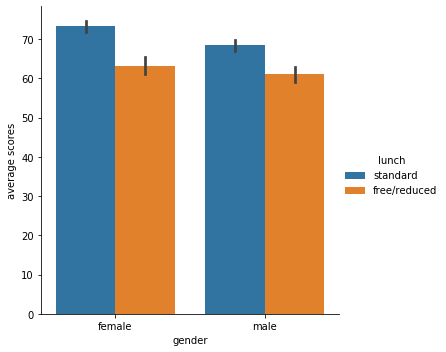

In [41]:
sns.catplot(x="gender", y="average scores", hue="lunch", kind="bar", data=df)

- Distribution by gender

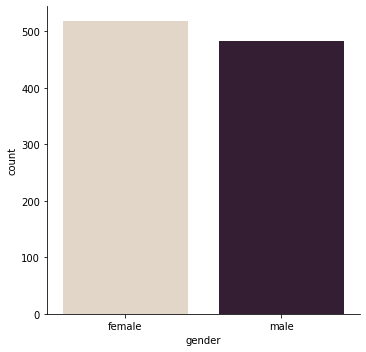

In [42]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=df)

- Distribution of parental level of education

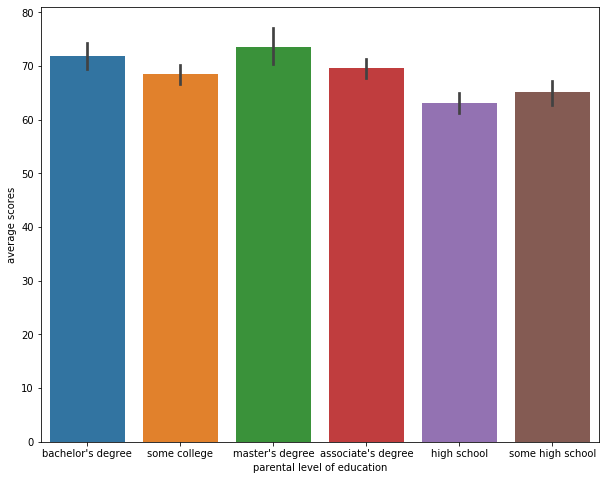

In [43]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="parental level of education", y="average scores", ax = ax, data=df)

- Test preparation Course against average scores

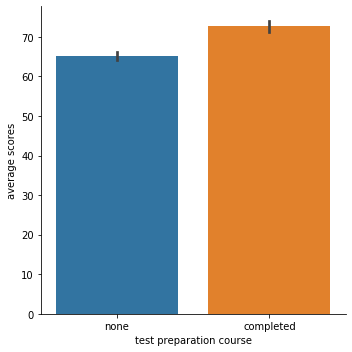

In [44]:
sns.catplot(x="test preparation course", y="average scores", kind="bar", data=df)

Examining the correlation between features

In [45]:
df.corr()

,math score,reading score,writing score,average scores
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
average scores,0.918746,0.970331,0.965667,1.000000


- Visualization showing a positive correlation between math and reading scores

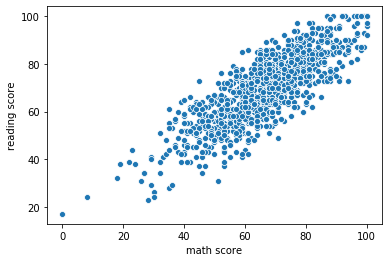

In [46]:
sns.scatterplot(x = "math score", y = "reading score", data=df)
plt.show()

- Visualization showing a positive correlation between math and writing scores

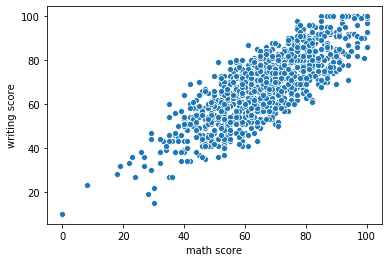

In [47]:
sns.scatterplot(x = "math score", y = "writing score", data=df)
plt.show()

- Visualization showing a positive correlation between writing and reading scores

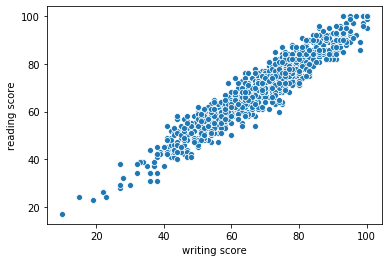

In [48]:
sns.scatterplot(x = "writing score", y = "reading score", data=df)
plt.show()